# STA 141B Data & Web Technologies for Data Analysis

### Lecture 12, 11/09/23, Natural language processing


### Announcements

 - Homework due tomorrow. 

### Today's topics
- Natural Language Processing
     - Standardizing Text
     - Feature extraction
         - Term frequencies
         - One-hot encoding
         - Term Frequency-Inverse Document Frequency

### Ressources
- [Natural Language Processing with Python][nlpp], chapters 1-3. Beware: the print version is for Python 2.
- [Scikit-Learn Documentation][skl], especially the section about [Text Feature Extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)


[PDSH]: https://jakevdp.github.io/PythonDataScienceHandbook/
[ProGit]: https://git-scm.com/book/
[nlpp]: https://www.nltk.org/book/
[atap]: https://search.library.ucdavis.edu/primo-explore/fulldisplay?docid=01UCD_ALMA51320822340003126&context=L&vid=01UCD_V1&search_scope=everything_scope&tab=default_tab&lang=en_US
[skl]: https://scikit-learn.org/stable/documentation.html


In [20]:
import nltk.corpus
import re

In [21]:
moby = nltk.corpus.gutenberg.raw("melville-moby_dick.txt")

In [22]:
re.findall(r"(?<!,\s{1})(ETYMOLOGY|CHAPTER\s{1}\d+|Epilogue|EXTRACTS(?=\s*\())\.*\s*(.+?\s*.*[\.{1}|!{1}|\){1}])", moby)

[('ETYMOLOGY', '(Supplied by a Late Consumptive Usher to a Grammar School)'),
 ('EXTRACTS', '(Supplied by a Sub-Sub-Librarian).'),
 ('CHAPTER 1', 'Loomings.'),
 ('CHAPTER 2', 'The Carpet-Bag.'),
 ('CHAPTER 3', 'The Spouter-Inn.'),
 ('CHAPTER 4', 'The Counterpane.'),
 ('CHAPTER 5', 'Breakfast.'),
 ('CHAPTER 6', 'The Street.'),
 ('CHAPTER 7', 'The Chapel.'),
 ('CHAPTER 8', 'The Pulpit.'),
 ('CHAPTER 9', 'The Sermon.'),
 ('CHAPTER 10', 'A Bosom Friend.'),
 ('CHAPTER 11', 'Nightgown.'),
 ('CHAPTER 12', 'Biographical.'),
 ('CHAPTER 13', 'Wheelbarrow.'),
 ('CHAPTER 14', 'Nantucket.'),
 ('CHAPTER 15', 'Chowder.'),
 ('CHAPTER 16', 'The Ship.'),
 ('CHAPTER 17', 'The Ramadan.'),
 ('CHAPTER 18', 'His Mark.'),
 ('CHAPTER 19', 'The Prophet.'),
 ('CHAPTER 20', 'All Astir.'),
 ('CHAPTER 21', 'Going Aboard.'),
 ('CHAPTER 22', 'Merry Christmas.'),
 ('CHAPTER 23', 'The Lee Shore.'),
 ('CHAPTER 24', 'The Advocate.'),
 ('CHAPTER 25', 'Postscript.'),
 ('CHAPTER 26', 'Knights and Squires.'),
 ('CHAPTER 27',

Perfect! But what if we want to match the chapters that follow after his matched string? 

In [23]:
re.findall(r"((?<!,\s{1})(?:ETYMOLOGY|CHAPTER\s{1}\d+|Epilogue|EXTRACTS(?=\s*\())(?:\.*\s*).+?\s*.*[\.{1}|!{1}|\){1}])", moby)

['ETYMOLOGY.\r\n\r\n(Supplied by a Late Consumptive Usher to a Grammar School)',
 'EXTRACTS (Supplied by a Sub-Sub-Librarian).',
 'CHAPTER 1\r\n\r\nLoomings.',
 'CHAPTER 2\r\n\r\nThe Carpet-Bag.',
 'CHAPTER 3\r\n\r\nThe Spouter-Inn.',
 'CHAPTER 4\r\n\r\nThe Counterpane.',
 'CHAPTER 5\r\n\r\nBreakfast.',
 'CHAPTER 6\r\n\r\nThe Street.',
 'CHAPTER 7\r\n\r\nThe Chapel.',
 'CHAPTER 8\r\n\r\nThe Pulpit.',
 'CHAPTER 9\r\n\r\nThe Sermon.',
 'CHAPTER 10\r\n\r\nA Bosom Friend.',
 'CHAPTER 11\r\n\r\nNightgown.',
 'CHAPTER 12\r\n\r\nBiographical.',
 'CHAPTER 13\r\n\r\nWheelbarrow.',
 'CHAPTER 14\r\n\r\nNantucket.',
 'CHAPTER 15\r\n\r\nChowder.',
 'CHAPTER 16\r\n\r\nThe Ship.',
 'CHAPTER 17\r\n\r\nThe Ramadan.',
 'CHAPTER 18\r\n\r\nHis Mark.',
 'CHAPTER 19\r\n\r\nThe Prophet.',
 'CHAPTER 20\r\n\r\nAll Astir.',
 'CHAPTER 21\r\n\r\nGoing Aboard.',
 'CHAPTER 22\r\n\r\nMerry Christmas.',
 'CHAPTER 23\r\n\r\nThe Lee Shore.',
 'CHAPTER 24\r\n\r\nThe Advocate.',
 'CHAPTER 25\r\n\r\nPostscript.',
 'CHAPTE

Check the [docs](https://docs.python.org/3/library/re.html#re.split). Remove the capturing group when splitting! 

In [24]:
chapters = re.split(r"(?<!,\s{1})(?:ETYMOLOGY|CHAPTER\s{1}\d+|Epilogue|EXTRACTS(?=\s*\())(?:\.*\s*).+?\s*.*[\.{1}|!{1}|\){1}]", moby)

In [25]:
chapters = [re.sub(r"\s+", " ", chapter) for chapter in chapters]
chapters[0:2]

['[Moby Dick by Herman Melville 1851] ',
 ' The pale Usher--threadbare in coat, heart, body, and brain; I see him now. He was ever dusting his old lexicons and grammars, with a queer handkerchief, mockingly embellished with all the gay flags of all the known nations of the world. He loved to dust his old grammars; it somehow mildly reminded him of his mortality. "While you take in hand to school others, and to teach them by what name a whale-fish is to be called in our tongue leaving out, through ignorance, the letter H, which almost alone maketh the signification of the word, you deliver that which is not true." --HACKLUYT "WHALE. ... Sw. and Dan. HVAL. This animal is named from roundness or rolling; for in Dan. HVALT is arched or vaulted." --WEBSTER\'S DICTIONARY "WHALE. ... It is more immediately from the Dut. and Ger. WALLEN; A.S. WALW-IAN, to roll, to wallow." --RICHARDSON\'S DICTIONARY KETOS, GREEK. CETUS, LATIN. WHOEL, ANGLO-SAXON. HVALT, DANISH. WAL, DUTCH. HWAL, SWEDISH. WHALE

In [26]:
chapter = chapters[3]
chapter[0:2000]

" Call me Ishmael. Some years ago--never mind how long precisely--having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people's hats off--then, I account it high time to get to sea as soon as I can. This is my substitute for pistol and ball. With a philosophical flourish Cato throws himself upon his sword; I quietly take to the ship. There is nothing surprising in this. If they but knew it, almo

### Standardizing Text

We standardize numerical data in order to make fair comparisons, comparisons that are not influenced by the location and scale of the data. Similarly, you can standardize text (tokens) to make sure comparisons are fair and accurate.

For example, `"Cat"` and `"cat"` are the same word even though they're different tokens. Converting all characters to lowercase is one way to standardize a document.

Some common standardization techniques for text are:

* Lowercasing
* Stemming: Use patterns to remove prefixes and suffixes from words.
* Lemmatiziation: Look up each token in a dictionary and replace it with a root word. Similar to stemming, but more accurate.
* Stopword Removal: Remove tokens that don't contribute meaning. For example, "the" is meaningless on its own.
* Identifying Outliers: Identify and possibly remove non-standard "words" like numbers, mispellings, code, etc...

How and whether you should standardize a document or corpus depends on what kind of analysis you want to do. There is no formula; you must think carefully and experiment to determine which standardization techniques work best for your problem.

#### Lowercasing

You can use Python's string methods for simple text transformations.

In [27]:
chapter[:100]

' Call me Ishmael. Some years ago--never mind how long precisely--having little or no money in my pur'

In [28]:
chapter.lower()[:100]

' call me ishmael. some years ago--never mind how long precisely--having little or no money in my pur'

In [29]:
chapter.upper()[:100]

' CALL ME ISHMAEL. SOME YEARS AGO--NEVER MIND HOW LONG PRECISELY--HAVING LITTLE OR NO MONEY IN MY PUR'

In [30]:
words = re.findall(r"\w+", chapter)

In [31]:
words[1:10]

['me', 'Ishmael', 'Some', 'years', 'ago', 'never', 'mind', 'how', 'long']

In [32]:
lower = [w.lower() for w in words] # lower and upper
lower[:10]

['call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long']

#### Stemming

_Stemming_ runs an algorithm on each token to remove affixes (prefixes and suffixes). The result is called a _stem_.

Stemming is useful if you want to ignore affixes.

For example, most English verbs use suffixes to mark the tense. We write "They fish" (present) and "They fished" (past). Without any standardization, the tokens "fish" and "fished" would be treated as separate words. Stemming converts both tokens to the common stem "fish":

In [33]:
[nltk.PorterStemmer().stem(w) for w in words][0:10]

['call',
 'me',
 'ishmael',
 'some',
 'year',
 'ago',
 'never',
 'mind',
 'how',
 'long']

In [34]:
print(nltk.PorterStemmer().stem("whales"))
print(nltk.PorterStemmer().stem("whaling"))
print(nltk.PorterStemmer().stem("whalebone"))
print(nltk.PorterStemmer().stem("narwhales"))

whale
whale
whalebon
narwhal


Stemmers use a sequence of rules to determine the stem for each token, but natural languages are full of special cases and exceptions. So as you can see in the example above, some stems are not words , and sometimes tokens that seem like they should have the same stem don't.

Several different stemmers are provided in the `nltk.stem` submodule.

#### Lemmatization

_Lemmatization_ looks up each token in a dictionary to find a root word, or _lemma_.

Lemmatization serves the same purpose as stemming. Lemmatization is more accurate, but requires a dictionary and usually takes longer.

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/peter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
nltk.WordNetLemmatizer().lemmatize("whales")

'whale'

In [37]:
nltk.WordNetLemmatizer().lemmatize("whaling")

'whaling'

In [38]:
nltk.WordNetLemmatizer().lemmatize("whaling", "v") #this is a verb - it should be lemmatized to 'whale'

'whale'

In [39]:
nltk.WordNetLemmatizer().lemmatize("whalebone")

'whalebone'

In [40]:
nltk.WordNetLemmatizer().lemmatize("narwhale")

'narwhale'

The WordNet lemmatizer requires part of speech information in order to lemmatize words. You can get approximate part of speech information with __nltk__'s `pos_tag()` function.

In [41]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/peter/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [42]:
nltk.pos_tag(["whaling"])

[('whaling', 'VBG')]

In [43]:
nltk.pos_tag(["whale"])

[('whale', 'NN')]

NLTK POS Tags are [Brown POS tags][brown]

[brown]: https://en.wikipedia.org/wiki/Brown_Corpus#Part-of-speech_tags_used

#### Foreign language

In [44]:
from nltk.stem.snowball import SnowballStemmer

In [45]:
fr = SnowballStemmer('french')

sent = "En mathématiques, une fonction càdlàg (continue à droite, limite à gauche) est ..."
nltk.word_tokenize(sent)

nltk.pos_tag([fr.stem(word) for word in nltk.word_tokenize(sent)])

[('en', 'JJ'),
 ('mathémat', 'NN'),
 (',', ','),
 ('une', 'JJ'),
 ('fonction', 'NN'),
 ('càdlàg', 'NN'),
 ('(', '('),
 ('continu', 'JJ'),
 ('à', 'NNP'),
 ('droit', 'NN'),
 (',', ','),
 ('limit', 'NN'),
 ('à', 'NNP'),
 ('gauch', 'NN'),
 (')', ')'),
 ('est', 'NN'),
 ('...', ':')]

In [46]:
moby_tags = nltk.pos_tag(words)
moby_tags[0:10]

[('Call', 'VB'),
 ('me', 'PRP'),
 ('Ishmael', 'NNP'),
 ('Some', 'DT'),
 ('years', 'NNS'),
 ('ago', 'RB'),
 ('never', 'RB'),
 ('mind', 'VB'),
 ('how', 'WRB'),
 ('long', 'JJ')]

The `nltk.stem` submodule also provides several different lemmatizers.

### Stopword Removal

_Stopwords_ are words that appear frequently but don't add meaning.

In English, "the", "a", and "at" are examples. However, exactly which words are stopwords depends on your analysis. Words that are meaningless in one analysis might be very important in others.

You can filter out stopwords with a list comprehension:

In [47]:
stopwords = ["the", "a", "and", "or", "in", "by"]
[w for w in words if w not in stopwords][0:10]

['Call',
 'me',
 'Ishmael',
 'Some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long']

__nltk__ also provides a stopwords corpus that contains common stopwords for several languages.

In [48]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/peter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
stopwords = nltk.corpus.stopwords.words("english")
[w for w in words if w not in stopwords][0:10]

['Call',
 'Ishmael',
 'Some',
 'years',
 'ago',
 'never',
 'mind',
 'long',
 'precisely',
 'little']

### Feature Engineering for Natural Language Data

Most statistical techniques take numbers as input. You may have already noticed this when working with categorical data. We can't compute the mean, median, standard deviation, or z-score if the observations aren't numbers. While we can fit linear models, it takes extra work because we have to create, or _engineer_, indicator variables.

We face the same problem with natural language data. We need to _quantify_ documents, or turn them into numbers, so that we can use a wider variety of statistical techniques. We can do this by engineering features from our documents.

So: what kinds of features can we create for language data?

In [50]:
import numpy as np
import pandas as pd
import nltk, nltk.corpus

#### Term Frequencies

One solution is to extend the idea of frequency analysis. We used frequency analysis to study individual documents, but what if we compute the word frequencies for every document in our corpus, and use those frequencies as features?

Let's try this for a small corpus:

In [51]:
corpus = ["The cat saw the dog was angry at the other cat.", 
          "The dog saw the cat was angry at the other cat.", 
          "The canary saw the iguana was sad."]

def get_freq_doc(doc):
    words = (w.lower() for w in nltk.word_tokenize(doc))
    #words = (w for w in words if w not in ["the", "a", "an", "at", 'other'] and w.isalnum())
    return nltk.FreqDist(words)

In [52]:
# use the function to get frequency for each word
df = pd.DataFrame([get_freq_doc(doc) for doc in corpus])

In [53]:
df = df.fillna(0)
df = df.astype(int)
df

,the,cat,saw,dog,was,angry,at,other,.,canary,iguana,sad
0,3,2,1,1,1,1,1,1,1,0,0,0
1,3,2,1,1,1,1,1,1,1,0,0,0
2,2,0,1,0,1,0,0,0,1,1,1,1


In [54]:
# The isalnum() method returns True if all characters in the string are alphanumeric
"dog?2".isalnum()

False

In [55]:
words = [re.findall(r"\w+", chapter) for chapter in chapters]
words.pop(0)
words = [w for l in words for w in l] 

In [56]:
words[0:10]

['The',
 'pale',
 'Usher',
 'threadbare',
 'in',
 'coat',
 'heart',
 'body',
 'and',
 'brain']

In [57]:
words = [w.lower() for w in words]
#words = [w for w in words if w.isalnum()]
words[0:10]

['the',
 'pale',
 'usher',
 'threadbare',
 'in',
 'coat',
 'heart',
 'body',
 'and',
 'brain']

In [58]:
len(set(words))

17003

`fq` will give the frequencies for each word, see [here](https://tedboy.github.io/nlps/generated/generated/nltk.FreqDist.html). 

In [59]:
fq = nltk.FreqDist(words)

In [60]:
fq

FreqDist({'the': 14334, 'of': 6598, 'and': 6413, 'a': 4726, 'to': 4622, 'in': 4161, 'that': 3085, 'his': 2528, 'it': 2522, 'i': 2126, ...})

Frequency distribution objects have a few methods to provide summary information.

The `.most_common()` method returns the most common tokens and their frequencies:

In [61]:
fq.most_common(10)

[('the', 14334),
 ('of', 6598),
 ('and', 6413),
 ('a', 4726),
 ('to', 4622),
 ('in', 4161),
 ('that', 3085),
 ('his', 2528),
 ('it', 2522),
 ('i', 2126)]

A _hapax_ is a token that only occurs once within a document. The `.hapaxes()` method returns the hapaxes:

In [62]:
len(fq.hapaxes())

7425

The `.plot()` method displays a plot of word frequencies, sorted from most to least frequent word.

The first parameter controls how many words to display. The second parameter controls whether the plot is cummulative.

In [63]:
%matplotlib inline

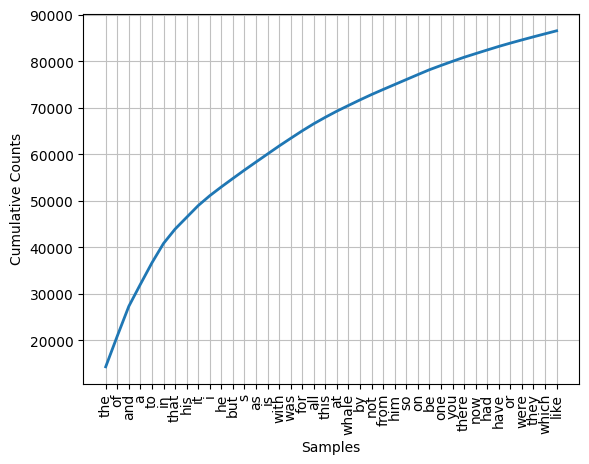

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [64]:
fq.plot(40, cumulative = True)

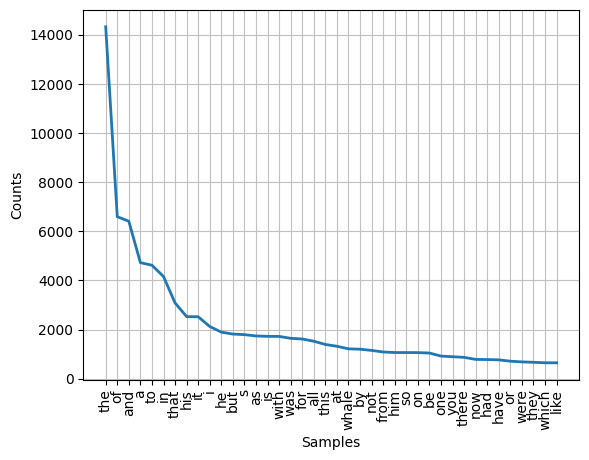

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [65]:
fq.plot(40)

Consider [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law): When the elements of a set - for example, the words of a text - are ordered by their frequency, the probability $p$ of their occurrence is inversely proportional to the place $n$ on the frequency list. 

In [66]:
logFreq = [np.log(i[1]) for i in fq.most_common(2000)]
logRank = [np.log(1 + i) for i in range(0,2000)]

In [67]:
logTheo = [np.log(1/(1 + i)) for i in range(0,2000)] + logFreq[0]

In [68]:
import plotnine as p9

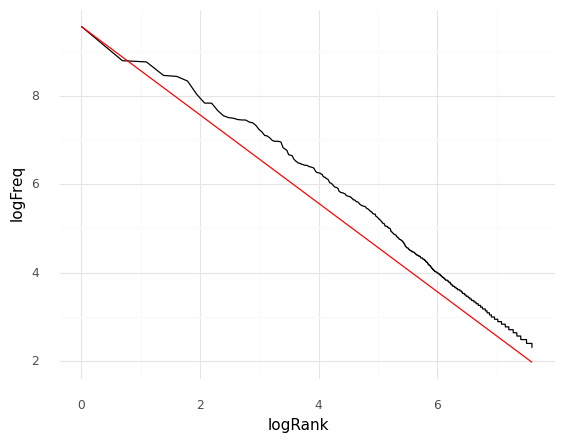

<ggplot: (8787227219059)>

In [69]:
(
p9.ggplot() + p9.theme_minimal() + 
    p9.geom_line(p9.aes(x='logRank', y='logFreq')) + 
    p9.geom_line(p9.aes(x='logRank', y='logTheo'), color = 'red') 
)

Notice that when we use term frequencies as features, we lose information about the order of the words in each document.

The first and second document contain the same words, but in different orders. The word frequency features for these two documents are identical.

The __scikit-learn__ package provides functions to help with feature engineering. The `sklearn.feature_extraction.text` submodule is specifically for extracting features from text documents.

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts.
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  -----

In [72]:
vec = CountVectorizer(tokenizer = nltk.word_tokenize)
freq = vec.fit_transform(corpus)

In [73]:
freq

<3x12 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [74]:
# .todense() convert sparse matrix to a dense matrix
# Don't do this for a really large matrix!
freq.todense()

matrix([[1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 3, 1],
        [1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 3, 1],
        [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1]])

In [75]:
df

,the,cat,saw,dog,was,angry,at,other,.,canary,iguana,sad
0,3,2,1,1,1,1,1,1,1,0,0,0
1,3,2,1,1,1,1,1,1,1,0,0,0
2,2,0,1,0,1,0,0,0,1,1,1,1


Use the `.get_feature_names_out()` method to see which term each column corresponds to:

In [76]:
vec.get_feature_names_out()

array(['.', 'angry', 'at', 'canary', 'cat', 'dog', 'iguana', 'other',
       'sad', 'saw', 'the', 'was'], dtype=object)

In [77]:
vec

CountVectorizer(tokenizer=<function word_tokenize at 0x7fdf18d85280>)

One problem with term frequencies is that some terms have high frequencies simply because they appear frequently in the language. These terms can cause documents to appear similar even if they are otherwise different.

While removing stopwords takes care of some high-frequency words, there may also be high-frequency words that have meaning and need to be kept.

### One-hot Encoding

We can avoid emphasis on high-frequency words by ignoring frequency altogether. Instead, we can create indicator variables for individual words. The indicator is 1 if the word appears in the document, and 0 otherwise.

In machine learning, an indicator variable is also called a _one-hot encoding_.

The `sklearn.preprocessing` submodule of __scikit-learn__ provides a function for one-hot encoding.

In [78]:
from sklearn.preprocessing import Binarizer
help(Binarizer)

Help on class Binarizer in module sklearn.preprocessing._data:

class Binarizer(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Binarizer(*, threshold=0.0, copy=True)
 |  
 |  Binarize data (set feature values to 0 or 1) according to a threshold.
 |  
 |  Values greater than the threshold map to 1, while values less than
 |  or equal to the threshold map to 0. With the default threshold of 0,
 |  only positive values map to 1.
 |  
 |  Binarization is a common operation on text count data where the
 |  analyst can decide to only consider the presence or absence of a
 |  feature rather than a quantified number of occurrences for instance.
 |  
 |  It can also be used as a pre-processing step for estimators that
 |  consider boolean random variables (e.g. modelled using the Bernoulli
 |  distribution in a Bayesian setting).
 |  
 |  Read more in the :ref:`User Guide <preprocessing_binarization>`.
 |  
 |  Parameters
 |  ----------
 |  th

In [79]:
freq

<3x12 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [80]:
(freq > 0).todense()

matrix([[ True,  True,  True, False,  True,  True, False,  True, False,
          True,  True,  True],
        [ True,  True,  True, False,  True,  True, False,  True, False,
          True,  True,  True],
        [ True, False, False,  True, False, False,  True, False,  True,
          True,  True,  True]])

In [81]:
binarizer = Binarizer()
ohot = binarizer.fit_transform(freq)
ohot.todense()

matrix([[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1],
        [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1]])

In [82]:
freq.todense()

matrix([[1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 3, 1],
        [1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 3, 1],
        [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1]])

In [83]:
corpus

['The cat saw the dog was angry at the other cat.',
 'The dog saw the cat was angry at the other cat.',
 'The canary saw the iguana was sad.']

In [84]:
vec.get_feature_names_out()

array(['.', 'angry', 'at', 'canary', 'cat', 'dog', 'iguana', 'other',
       'sad', 'saw', 'the', 'was'], dtype=object)

As with term frequencies, we lose information about the order of the words in the document.

One-hot encoding as an extreme transformation: every term is equally important. This means terms that are relatively rare or unique still might be underemphasized (this is also a problem for term frequencies).

### Term Frequency-Inverse Document Frequency

_Term frequency-inverse document frequency_ (tf-idf) statistics put terms on approximately the same scale while also emphasizing relatively rare terms. There are [several different tf-idf statistics](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

The _smoothed tf-idf_, for a term $t$ and document $d$, is given by:

$$
\operatorname{tf-idf}(t, d) = \operatorname{tf}(t, d) \cdot \log \left( \frac{N}{1 + n_t} \right)
$$

where $N$ is the total number of documents and $n_t$ is the number of documents that contain $t$.

The `sklearn.feature_extraction.text` submodule of __scikit-learn__ provides a function for computing tf-idf:

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
help(TfidfVectorizer)

Help on class TfidfVectorizer in module sklearn.feature_extraction.text:

class TfidfVectorizer(CountVectorizer)
 |  TfidfVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
 |  
 |  Convert a collection of raw documents to a matrix of TF-IDF features.
 |  
 |  Equivalent to :class:`CountVectorizer` followed by
 |  :class:`TfidfTransformer`.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------
 |  input : {'filename', 'file', 'content'}, default='content'
 |      - If `'filename'`, the sequence passed as an argument to fit is
 |        expected to be a list of filenames that need reading to fetc

In [86]:
vec = TfidfVectorizer(tokenizer = nltk.word_tokenize) 
tfidf = vec.fit_transform(corpus)

In [87]:
vec.get_feature_names_out()

array(['.', 'angry', 'at', 'canary', 'cat', 'dog', 'iguana', 'other',
       'sad', 'saw', 'the', 'was'], dtype=object)

In [88]:
tfidf.todense()

matrix([[0.19894835, 0.25618222, 0.25618222, 0.        , 0.51236445,
         0.25618222, 0.        , 0.25618222, 0.        , 0.19894835,
         0.59684505, 0.19894835],
        [0.19894835, 0.25618222, 0.25618222, 0.        , 0.51236445,
         0.25618222, 0.        , 0.25618222, 0.        , 0.19894835,
         0.59684505, 0.19894835],
        [0.25318288, 0.        , 0.        , 0.42867587, 0.        ,
         0.        , 0.42867587, 0.        , 0.42867587, 0.25318288,
         0.50636575, 0.25318288]])

In [89]:
(1 / 12) * np.log(3 / ( 1 + 3)) # '.' appears once in all 12 words,

-0.023973506037648407

In [90]:
corpus

['The cat saw the dog was angry at the other cat.',
 'The dog saw the cat was angry at the other cat.',
 'The canary saw the iguana was sad.']

In long documents or documents with many high-frequency terms, we can further reduce the emphasis on these terms by taking the logarithm of the term frequency. To do this, set `sublinear_tf = True` in the `TfidfVectorizer()` function.

## The Bag-of-words Model

The one-hot encoding, term frequencies, and TF-IDF scores all ignore word order.

The _bag-of-words model_ assumes that the order of words in a document doesn't matter. Imagine taking the words in each document and dumping them into a bag, where they get all mixed up. Note that in this case "model" means a way of thinking about a problem, not a statistical model.

While the order of words in a document might seem important, the bag-of-words model is surprisingly useful. The bag-of-words model is a good place to start if you want to use statistical methods on language data.

## Measuring Similarity

We can measure the _similarity_ of two documents by computing the distance between their term frequency vectors. There are many different ways we can measure distance and similarity:

* Minkowski distance, a family of distances that includes Euclidean distance ($\ell_2$-norm) and Manhattan distance ($\ell_1$-norm). 
 * $\ell_2$-norm, $\|a - b \|_2 = \sqrt{\sum_{i=1}^n (a_i - b_i)^2}$
 * $\ell_1$-norm, $\|a -b\|_1 = \sum_{i=1}^n |a_i - b_i|$

* $\ell_\infty$-norm, $\|a-b\|_\infty = \max_{1\leq i\leq n} |a_i - b_i|$

    * Relation between those norms: $\|\cdot\|_1$ $\geq$ $\|\cdot\|_2$ $\geq$ $\cdots$ $\geq$ $\|\cdot\|_\infty$

* Mahalanobis distance, the Euclidean distance between z-scores.
* Cosine similarity, the cosine of the angle between two vectors. See [here](https://stats.stackexchange.com/a/235676/29695) for an explanation of how cosine similarity is related to correlation. Note that the range of cosine is $[-1, 1]$ and $\cos(0) = 1$, so vectors that are close together will have a cosine similarity close to 1, not 0.
* And others...

Cosine similarity often works well for language data. The cosine similarity between two vectors $a$ and $b$ is defined as:

$$
\frac{a'b}{\Vert a \Vert_2 \Vert b \Vert_2}.
$$

The `TfidfVectorizer()` function already divides the returned tf-idf vectors by their Euclidean norms, so we can compute cosine similarity as a simple dot product:

In [91]:
pd.DataFrame(tfidf.todense())

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.198948,0.256182,0.256182,0.000000,0.512364,0.256182,0.000000,0.256182,0.000000,0.198948,0.596845,0.198948
1,0.198948,0.256182,0.256182,0.000000,0.512364,0.256182,0.000000,0.256182,0.000000,0.198948,0.596845,0.198948
2,0.253183,0.000000,0.000000,0.428676,0.000000,0.000000,0.428676,0.000000,0.428676,0.253183,0.506366,0.253183


In [92]:
(tfidf @ tfidf.T).todense()

matrix([[1.        , 1.        , 0.45333284],
        [1.        , 1.        , 0.45333284],
        [0.45333284, 0.45333284, 1.        ]])

Part of the reason that cosine similarity is a good measure in NLP is that cosine similarity, like correlation, is not affected by the scale of the vector elements. For vectors that contain term frequencies (or functions of term frequencies), this means that the length of the original documents will not affect whether or not they are similar -- only their word content will.

### Summary 

- Standardize text first
- Engineer features depending on priorities